# Визуализация python

Виды графиков и решаемые проблемы

In [25]:
import sys
import datetime
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# для упрощения работы с данными добавим sql
from math import radians, cos, sin, asin, sqrt
from sklearn.linear_model import LinearRegression

sns.set(style="ticks")
%matplotlib inline

In [26]:
# Загрузим датасет с ресурса 
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
# для того чтобы использовалось меняьше оперативной памяти используем low memory
df = pd.read_csv(file_name, low_memory= True)
# прочтем хедер для общего понимания. итак. у нас есть 22 столбца
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Описание датасета

| Переменная    | Описание                                                                                                                 |
| ------------- | ------------------------------------------------------------------------------------------------------------------------ |
| id            | Нотация для дома                                                                                                         |
| date          | дата когда было продано                                                                                                    |
| price         | Цена - это цель прогноза                                                                                                 |
| bedrooms      | Количество спален                                                                                                        |
| bathrooms     | Количество ванных комнат                                                                                                 |
| sqft_living   | Квадратные метры дома                                                                                                    |
| sqft_lot      | Квадратные метры лота                                                                                                    |
| floors        | Общие полы (уровни) в доме                                                                                               |
| waterfront    | Дом, который имеет вид на набережную                                                                                     |
| view          | Был просмотрен                                                                                                           |
| condition     | Насколько хорошим состояние в целом                                                                                      |
| grade         | Общая оценка, предоставленная жилищному подразделению, на основе системы оценки округа Кинг                              |
| sqft_above    | Квадратные метры дома, кроме подвала                                                                                     |
| sqft_basement | Квадратные метры подвала                                                                                                 |
| yr_built      | Построен год                                                                                                             |
| yr_renovated  | Год, когда дом был отремонтирован                                                                                        |
| zipcode       | Zip code                                                                                                                 |
| lat           | Широта координата                                                                                                        |
| long          | Координата долготы                                                                                                       |
| sqft_living15 | Гостиная зона в 2015 году (подразумевает- некоторые ремонтные работы) Это могло или не могло повлиять на область участка |
| sqft_lot15    |Район лот размещения в 2015 году (подразумевает- некоторые ремонтные работы)                                              |


In [ ]:
# SQL statements

## Проанализирую типы данных. Найду пропущенные значения

In [27]:
# Просмотрм типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [5]:
# посмотрим пустые ячейки. в датасете они есть. ячейки исходя из информации числовые. необходимо заполнить данные
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [4]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [28]:
# Заполним средним значением с помощью метода fillna().
# df['имя столбца с пропущенными значениями'] = df['имя столбца с пропущенными значениями'].заполнить(средними значениями столбца )
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())

# ИЛИ взять медиану каждого столбца и воспользоваться библиотекой нумпай и функцией replace значений nan значением переменной mean
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace = True)
# так же для второго столбцы
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [8]:
#Проверим остались ли пустые значения
print("Количество пустых ячеек в столбце bedrooms :", df['bedrooms'].isnull().sum())
print("Количество пустых ячеек в столбце  bathrooms :", df['bathrooms'].isnull().sum())

Количество пустых ячеек в столбце bedrooms : 0
Количество пустых ячеек в столбце  bathrooms : 0


## Базовый график plot() - строит линейный график. Отвечает на вопрос "Как меняется значение столбца в зачисимости от изменения другого значения"

**Синтаксис:**           
  
                        df.plot(x='Column1', y='Column2')

                        plt.show()

In [9]:
# просмотрим формат даты. мне он не очень подходит так как я хочу иметь только ГГГГММДД
df[['date']].head()

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000


In [54]:
# положим в датафрейм столбца дата новый формат этой самой даты с помощью конвертации его в более понятный формат 
# с помощью to_datetame() столбец.
df['date'] = pd.to_datetime(df.date)
# print (df)

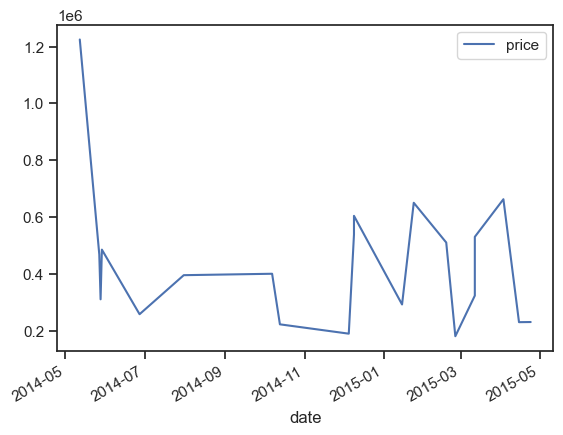

In [55]:
# будем работать с ячейками содержащими дату ( 2   date  object ) и ценой продажи
data = df.head(20)
data.plot(x ='date', y ='price')
# используется plt.show(), чтобы отобразить график. plt - это сокращение для matplotlib.pyplot, библиотеки для визуализации данных, которая используется в Pandas.
plt.show()

# Skatterplot

scatter() - строит диаграмму рассеяния. Отвечает на вопрос "Есть ли связь между значениями двух столбцов?"

перед тем как работать с этим графиком, можно проветить. какие столбцы больше всего коррелируют с ценой

In [13]:
# импользуем использовать метод корреляции Пирсона для сравнения двух непрерывных числовых переменных
df.corr(method ='pearson')
# в итоге мы можем посмотреть корреляции между всеми переменными в датасете. 

C:\Users\admin\AppData\Local\Temp/ipykernel_9412/2515729197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000,0.006718,0.027372,0.010306,0.106989,0.044717,-0.026877,0.179138,-0.007611,-0.013751,...,0.082050,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827
id,0.006718,1.000000,-0.016762,0.001331,0.005233,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,0.027372,-0.016762,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.010306,0.001331,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,...,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.106989,0.005233,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,...,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.044717,-0.012258,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.026877,-0.132109,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.179138,0.018525,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.007611,-0.002721,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.013751,0.011592,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


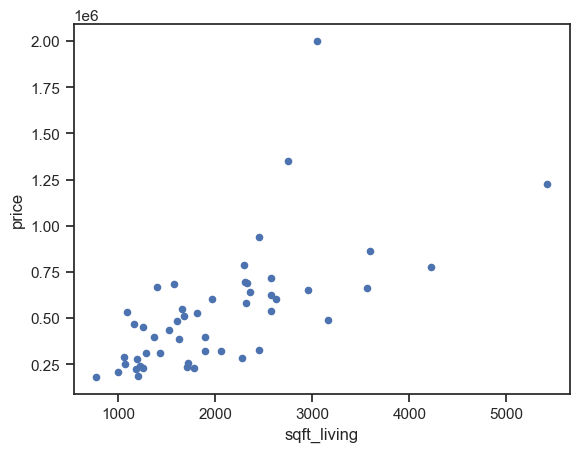

In [56]:
df = df.head(1000)
df.plot.scatter(x ='sqft_living', y ='price')
plt.show()